# Age prediction in Herb et al., 2023 human fetal hypothalamus
><b> This notebook contains R code to predict developmental age of cell types in Herb et al.2023, a fetal human hypothalamus dataset used in our paper <br>We will use the pre-trained celltype agnostic model to predict developmental age from the transcriptome </b> <br> Data were processed using the fetal_hypothalamus_processing.r script.

In [1]:
setwd("/home/sridevi/inkwell03_sridevi//metadevorganoid/werneranalysis/DevTime_gitub_repo/") #change to the working directory

In [2]:
library(Seurat)
library(dplyr)
library(caret)
library(readr)
library(ggplot2)
library(stringr)
library(ggpubr)
library(tidyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [3]:
load("processed_data/Herb_processed.Rdata")
final_common_genes<-readRDS("models/commongenes.rds")#list of common genes

---

# <i> Developmental age prediction using cell type agnostic model
><b> We will use the original cell type agnostic model stored in /models to verify predicted ages in the Herb 2023 dataset

In [4]:
celltypeagnosticmodel<-readRDS("models/original_celltypeagnostic_model.rds")

In [5]:
#check model coefficients
coefs<-as.data.frame(coef(celltypeagnosticmodel$finalModel, celltypeagnosticmodel$finalModel$lambdaOpt))%>%dplyr::filter(s1!=0)
coefs$genes<-rownames(coefs)
coefs

,s1,genes
,<dbl>,<chr>
(Intercept),11.25612595,(Intercept)
PDK4,0.40616305,PDK4
TAC1,-0.06138818,TAC1
CX3CL1,2.02815101,CX3CL1
PNPLA4,-0.96997077,PNPLA4
CACNA2D2,-1.85735642,CACNA2D2
CAMK1G,0.44071996,CAMK1G
NFIX,0.15785721,NFIX
CD9,0.06357692,CD9


In [6]:
herb_predicted_ages=predict(celltypeagnosticmodel,t(Herb_pb_combinedcelltypes))#predict the age
Herb_metadata$predictedage<-herb_predicted_ages
mean_age<-Herb_metadata%>%group_by(obs_age)%>%summarise(avg=mean(predictedage),
                                                              sem=(sd(predictedage)/sqrt(length(predictedage))))

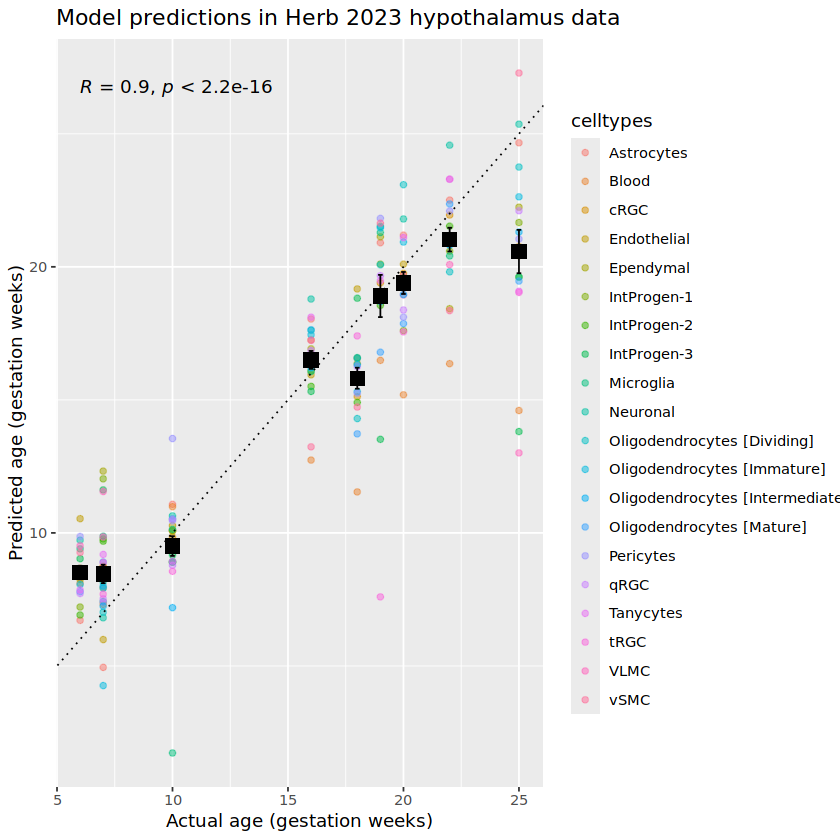

In [9]:
Herb_pred_plt<-ggplot(data=Herb_metadata,aes(x=as.numeric(obs_age),y=predictedage))+geom_point(alpha=0.5,aes(col=celltypes))+stat_cor()+
ggtitle("Model predictions in Herb 2023 hypothalamus data")+xlab("Actual age (gestation weeks)")+ylab("Predicted age (gestation weeks)")+
geom_abline(slope=1,linetype=3)+
geom_point(data=mean_age,aes(x=as.numeric(obs_age),y=avg),size=4,shape="square")+
geom_errorbar(data=mean_age,aes(x=as.numeric(obs_age),y=avg,ymin=avg-sem,ymax=avg+sem),width=0.2)
Herb_pred_plt

Predicted ages are highly correlated to the actual age in a human fetal dataset not used for training

In [10]:
png(file="figures/Herb2023_predictions.png")
Herb_pred_plt
dev.off()

pdf 
  2